# data augmentation to address overfitting

run on google colab

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)           

228827136/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg')]

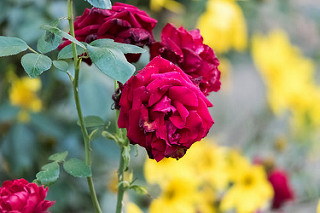

In [7]:
PIL.Image.open(str(roses[1]))

In [8]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/17408197905_829c4d7940_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/10094729603_eeca3f2cb6.jpg'),
 PosixPath('datasets/flower_photos/tulips/11746548_26b3256922_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/175686816_067a8cb4c5.jpg'),
 PosixPath('datasets/flower_photos/tulips/478765271_6a8ca1cfa1_m.jpg')]

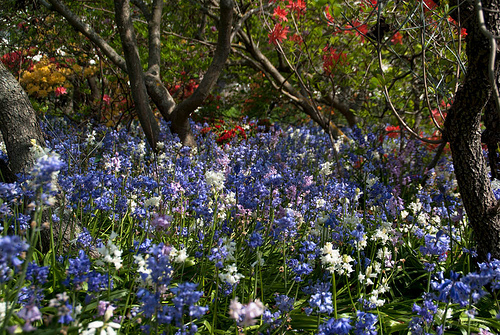

In [9]:
PIL.Image.open(str(tulips[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob(str('roses/*'))),
    'daisy': list(data_dir.glob(str('daisy/*'))),
    'dandelion': list(data_dir.glob(str('dandelion/*'))),
    'sunflowers':list(data_dir.glob(str('sunflowers/*'))),
    'tulips': list(data_dir.glob(str('tulips/*')))
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion':2,
    'sunflowers': 3,
    'tulips': 4
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1667199972_7ba7d999c1_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15094168139_8f636ffa1d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg')]

In [13]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/99383371_37a5ac12a3_n.jpg')

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(229, 320, 3)

In [15]:
cv2.resize(img, (180,180)).shape

(180, 180, 3)

In [16]:
x,y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img, (180,180))
        x.append(resize_img)
        y.append(flowers_labels_dict[flower_name])

In [17]:
y[:5]

[0, 0, 0, 0, 0]

In [18]:
x[0]

array([[[ 52,  71,  75],
        [ 59,  78,  81],
        [ 69,  89,  90],
        ...,
        [183, 195, 195],
        [182, 194, 194],
        [181, 193, 193]],

       [[ 54,  71,  74],
        [ 60,  79,  81],
        [ 69,  89,  90],
        ...,
        [180, 194, 193],
        [179, 193, 192],
        [177, 191, 190]],

       [[ 57,  74,  73],
        [ 62,  81,  80],
        [ 69,  90,  91],
        ...,
        [176, 191, 192],
        [175, 190, 191],
        [173, 187, 188]],

       ...,

       [[ 26,  29,  22],
        [ 13,  25,  13],
        [ 25,  24,  19],
        ...,
        [150, 171, 173],
        [148, 168, 172],
        [144, 163, 170]],

       [[ 34,  32,  27],
        [ 23,  33,  25],
        [ 65,  71,  70],
        ...,
        [154, 175, 177],
        [154, 174, 179],
        [152, 172, 178]],

       [[ 35,  37,  32],
        [ 35,  49,  42],
        [ 79,  98,  99],
        ...,
        [157, 177, 178],
        [160, 179, 182],
        [160, 179, 185]]

In [19]:
x = np.array(x)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [21]:
len(x_train)

2936

In [22]:
len(x_test)

734

In [23]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [24]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 17s 59ms/step - loss: 1.4024 - accuracy: 0.4111
Epoch 2/30
92/92 [==============================] - 5s 55ms/step - loss: 0.9782 - accuracy: 0.6196
Epoch 3/30
92/92 [==============================] - 5s 54ms/step - loss: 0.7876 - accuracy: 0.7037
Epoch 4/30
92/92 [==============================] - 5s 54ms/step - loss: 0.6167 - accuracy: 0.7643
Epoch 5/30
92/92 [==============================] - 5s 55ms/step - loss: 0.4119 - accuracy: 0.8484
Epoch 6/30
92/92 [==============================] - 5s 54ms/step - loss: 0.2172 - accuracy: 0.9343
Epoch 7/30
92/92 [==============================] - 5s 55ms/step - loss: 0.1212 - accuracy: 0.9670
Epoch 8/30
92/92 [==============================] - 5s 55ms/step - loss: 0.0633 - accuracy: 0.9864
Epoch 9/30
92/92 [==============================] - 5s 56ms/step - loss: 0.0760 - accuracy: 0.9779
Epoch 10/30
92/92 [==============================] - 5s 56ms/step - loss: 0.0296 - accuracy: 0.9935
Epoch 11

In [25]:
model.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 1s 33ms/step - loss: 2.5267 - accuracy: 0.6104


[2.526707887649536, 0.6103542447090149]

In [26]:
predictions = model.predict(x_test_scaled)
predictions

array([[-2178.3972 ,   803.35034,   485.32144,  -621.09265,   197.86723],
       [ 2161.384  ,   473.11   , -2567.3408 ,   151.27948,  4772.461  ],
       [  581.31085,   305.00616,  1004.0211 , -1833.0024 ,  1607.5376 ],
       ...,
       [ 1086.9744 ,  1473.9062 , -1131.3239 ,  -442.28415,  1307.4989 ],
       [-1919.5319 , -2730.124  ,   397.9603 ,  2845.2698 ,  1452.0698 ],
       [-1711.7039 ,   885.0231 ,   285.30917,   250.09608,   645.9574 ]],
      dtype=float32)

In [27]:
score = tf.nn.softmax(predictions[0])

In [28]:
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 0., 0., 0.], dtype=float32)>

In [29]:
np.argmax(score)

1

In [30]:
y_test[0]

1

### Improve accuracy using data augmentation

In [62]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
                                                 
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

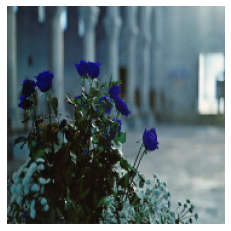

In [42]:
plt.axis('off')
plt.imshow(x[0])

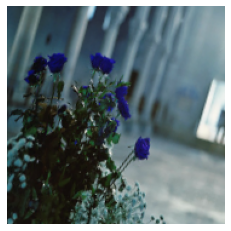

In [59]:
plt.axis('off')
# plt.imshow(data_augmentation(x)[0])
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

### Train the model using data augmentation and a drop out layer

In [64]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(x_train_scaled, y_train, epochs=30) 

Epoch 1/30
92/92 [==============================] - 8s 65ms/step - loss: 1.5094 - accuracy: 0.3212
Epoch 2/30
92/92 [==============================] - 6s 65ms/step - loss: 1.1473 - accuracy: 0.5252
Epoch 3/30
92/92 [==============================] - 6s 66ms/step - loss: 1.0251 - accuracy: 0.5981
Epoch 4/30
92/92 [==============================] - 6s 65ms/step - loss: 0.9485 - accuracy: 0.6301
Epoch 5/30
92/92 [==============================] - 6s 66ms/step - loss: 0.9164 - accuracy: 0.6499
Epoch 6/30
92/92 [==============================] - 6s 67ms/step - loss: 0.8798 - accuracy: 0.6591
Epoch 7/30
92/92 [==============================] - 6s 66ms/step - loss: 0.8372 - accuracy: 0.6812
Epoch 8/30
92/92 [==============================] - 6s 65ms/step - loss: 0.8150 - accuracy: 0.6853
Epoch 9/30
92/92 [==============================] - 6s 66ms/step - loss: 0.8125 - accuracy: 0.6853
Epoch 10/30
92/92 [==============================] - 6s 65ms/step - loss: 0.7615 - accuracy: 0.7023
Epoch 11/

In [65]:
model.evaluate(x_test_scaled, y_test)

23/23 [==============================] - 1s 22ms/step - loss: 0.7960 - accuracy: 0.7193


[0.7959631085395813, 0.7193460464477539]

In [69]:
score = tf.nn.softmax(predictions[7])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 1.], dtype=float32)>

In [70]:
np.argmax(score)

4

In [71]:
y_test[7]

4